# Data Munging - 2014 Kenya Education Data

### Download the data (Extraction)

Thankfully, the data set we want to use can be obtained in tabular format from the [Kenya openData portal](https://icta-kenyaopendata.opendata.arcgis.com/datasets/national-boys-and-girls-enrollments-per-class-for-primary-school-education). The **National Boys and Girls Enrollments per Class for Primary School Education** data set can be downloaded from there in a CSV format (**Download** button, select **Spreadsheet**). 

### Wrangle the Data (Tranform)

In [1]:
# import csv, pandas, and matplotlib libraries
# set the magic (%) for matplotlib to render visualizations in the notebook
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

%matplotlib inline

In [2]:
# import the original CSV into Pandas to produce a data frame
kenya_ed = pd.read_csv('National_Boys_and_Girls_Enrollments_per_Class_for_Primary_School_Education_original.csv')
kenya_ed.head()

,COUNTY,Class,Number,Gender,Year,County_Centroids,OBJECTID
0,Baringo,Class 1,10356,Boys,12/31/2014 12:00:00 AM,"(0.6692519803, 35.9464653527)",0
1,Baringo,Class 1,9281,Girls,12/31/2014 12:00:00 AM,"(0.6692519803, 35.9464653527)",1
2,Bomet,Class 1,15313,Girls,12/31/2014 12:00:00 AM,"(-0.7262945834, 35.2985975867)",2
3,Bomet,Class 1,16480,Boys,12/31/2014 12:00:00 AM,"(-0.7262945834, 35.2985975867)",3
4,Bungoma,Class 1,33985,Boys,12/31/2014 12:00:00 AM,"(0.7492852396, 34.6404608756)",4


In [3]:
# declare 2 new lists that will collect our latitudes and longitudes
# these will become our new columns
LAT = []
LON = []

# clean up County_Centroids by stripping '(', ' ', and ')'
kenya_ed['County_Centroids'] = kenya_ed['County_Centroids'].map(lambda x: x.strip('( )'))

# loop through each row in the kenya_ed data frame and find the 'County_Centroid' column
for row in kenya_ed['County_Centroids']:
    # split County_Centroid at the comma and place index position 0 into our LAT list
    LAT.append(row.split(',')[0])
    # split County_Centroid at the comma and place index position 1 into our LON list
    LON.append(row.split(',')[1])

# create new columns in kenya_ed with our LAT and LON lists
kenya_ed['LAT'] = LAT
kenya_ed['LON'] = LON

# drop the Year and County_Centroid columns
kenya_ed_clean = kenya_ed.drop(columns=['Year', 'County_Centroids'])

# View the first 5 rows of our modified data
kenya_ed_clean.head(5)

,COUNTY,Class,Number,Gender,OBJECTID,LAT,LON
0,Baringo,Class 1,10356,Boys,0,0.6692519803,35.9464653527
1,Baringo,Class 1,9281,Girls,1,0.6692519803,35.9464653527
2,Bomet,Class 1,15313,Girls,2,-0.7262945834,35.2985975867
3,Bomet,Class 1,16480,Boys,3,-0.7262945834,35.2985975867
4,Bungoma,Class 1,33985,Boys,4,0.7492852396,34.6404608756


In [4]:
# take our clean data, call the pivot table method
# call 'Number' to fill out data table
# begin each row with an index of 'COUNTY', 'LAT', 'LON'
# set the multi-index for our columns as a combination of 'Gender' and 'Class'
kenya_pivot = kenya_ed_clean.pivot_table(['Number'], index=['COUNTY', 'LAT', 'LON'], columns=['Gender', 'Class'])

# view the first 5 rows of our pivot table
kenya_pivot.head(5)

Number                          \
Gender                                          Boys                           
Class                                        Class 1 Class 2 Class 3 Class 4   
COUNTY          LAT           LON                                              
Baringo         0.6692519803   35.9464653527   10356    9431    9313   10201   
Bomet           -0.7262945834  35.2985975867   16480   15837   15648   15747   
Bungoma         0.7492852396   34.6404608756   33985   33855   34695   34749   
Busia           0.3874436775   34.1936314884   18613   17737   17574   17235   
Elgeyo Marakwet 0.8022188109   35.5365631474    8071    7664    7519    7856   

                                                                              \
Gender                                                                         
Class                                        Class 5 Class 6 Class 7 Class 8   
COUNTY          LAT           LON                                              
Baringo         0.6692519803   35.9464653527    9383    9551    9865    7484   
Bomet           -0.7262945834  35.2985975867   14507   14450   15725   10872   
Bungoma         0.7492852396   34.6404608756   33876   34084   33430   19176   
Busia           0.3874436775   34.1936314884   16427   15802   14241    9169   
Elgeyo Marakwet 0.8022188109   35.5365631474    7599    8041    8064    5662   

                                                                              \
Gender                                         Girls                           
Class                                        Class 1 Class 2 Class 3 Class 4   
COUNTY          LAT           LON                                              
Baringo         0.6692519803   35.9464653527    9281    8555    8681    9551   
Bomet           -0.7262945834  35.2985975867   15313   14553   14780   14865   
Bungoma         0.7492852396   34.6404608756   34329   34135   34414   35206   
Busia           0.3874436775   34.1936314884   18428   17653   17200   17729   
Elgeyo Marakwet 0.8022188109   35.5365631474    7496    7255    7233    7698   

                                                                              
Gender                                                                        
Class                                        Class 5 Class 6 Class 7 Class 8  
COUNTY          LAT           LON                                             
Baringo         0.6692519803   35.9464653527    9188    9424    9815    7265  
Bomet           -0.7262945834  35.2985975867   14557   14657   16342   10983  
Bungoma         0.7492852396   34.6404608756   34410   34546   34879   19593  
Busia           0.3874436775   34.1936314884   17150   16481   14680    8889  
Elgeyo Marakwet 0.8022188109   35.5365631474    7583    8228    8700    5950

In [5]:
# save our pivot table as 'kenya_education_2014.csv'
kenya_pivot.to_csv('kenya_education_2014.csv')

In [6]:
# import the 'kenya_education_2014.csv' we just saved
# skip the first 4 rows that have stacked names
# give pandas a list of column names to use
kenya_ed_2014 = pd.read_csv('kenya_education_2014.csv', skiprows=4, names=['COUNTY', 'LAT', 'LON', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8'], index_col='COUNTY')

# view the first 5 rows of our fixed data frame
kenya_ed_2014.head(5)

,LAT,LON,B1,B2,B3,B4,B5,B6,B7,B8,G1,G2,G3,G4,G5,G6,G7,G8
COUNTY,,,,,,,,,,,,,,,,,,
Baringo,0.669252,35.946465,10356,9431,9313,10201,9383,9551,9865,7484,9281,8555,8681,9551,9188,9424,9815,7265
Bomet,-0.726295,35.298598,16480,15837,15648,15747,14507,14450,15725,10872,15313,14553,14780,14865,14557,14657,16342,10983
Bungoma,0.749285,34.640461,33985,33855,34695,34749,33876,34084,33430,19176,34329,34135,34414,35206,34410,34546,34879,19593
Busia,0.387444,34.193631,18613,17737,17574,17235,16427,15802,14241,9169,18428,17653,17200,17729,17150,16481,14680,8889
Elgeyo Marakwet,0.802219,35.536563,8071,7664,7519,7856,7599,8041,8064,5662,7496,7255,7233,7698,7583,8228,8700,5950


In [7]:
# save our completed data frame again as 'kenya_education_2014.csv'
kenya_ed_2014.to_csv('kenya_education_2014.csv')

### Move the Data (Load)

Once we have our final **kenya_education_2014.csv**, we can now place the file into our */data* directory of our project.

# Data Exploration

Import our **kenya_education_2014.csv** as we did before with Pandas. Pandas and Matplotlib provide numerous ways for us to explore and visualize our data.

This step is important as understanding our data guides us in the selection of themes for our maps and any supporting visualizations.

If you have already ran the code above there is no need to re-import the CSV file.

In [8]:
kenya_ed_2014.describe()

,LAT,LON,B1,B2,B3,B4,B5,B6,B7,B8,G1,G2,G3,G4,G5,G6,G7,G8
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,-0.340318,36.790403,15151.723404,14465.787234,14350.638298,14423.744681,13626.914894,13220.765957,12727.212766,9530.851064,14264.723404,13720.276596,13567.829787,13865.531915,13365.170213,13158.553191,12786.595745,9491.680851
std,1.642490,1.911049,8442.108107,8259.191128,8341.369248,8452.310066,8129.489828,7919.892786,7554.429187,5609.401313,8425.428965,8307.989493,8327.138253,8672.132324,8456.156827,8402.213463,8174.708958,6090.845469
min,-4.183150,34.193631,2267.000000,1960.000000,1780.000000,1912.000000,1704.000000,1606.000000,1578.000000,1248.000000,1939.000000,1751.000000,1806.000000,1762.000000,1762.000000,1615.000000,1493.000000,1233.000000
25%,-1.161748,35.177167,8294.000000,8123.500000,8535.000000,8104.000000,7658.000000,7823.500000,7655.000000,5240.000000,7322.000000,7187.000000,7360.000000,7689.000000,7729.500000,7628.000000,7046.500000,5002.000000
50%,-0.342924,36.823564,14725.000000,13015.000000,12506.000000,13133.000000,11975.000000,11169.000000,10431.000000,9169.000000,13086.000000,12171.000000,11960.000000,11980.000000,11588.000000,11368.000000,10738.000000,8889.000000
75%,0.464885,37.829271,19688.500000,19257.000000,18773.000000,19896.000000,18969.500000,18560.500000,18034.000000,12564.000000,18589.500000,17645.500000,17228.000000,18272.000000,18133.000000,18577.500000,17539.500000,11915.500000
max,3.436469,40.882861,39007.000000,38554.000000,38719.000000,37948.000000,35862.000000,34387.000000,33430.000000,22996.000000,38572.000000,38121.000000,37398.000000,38537.000000,37039.000000,36779.000000,34879.000000,24960.000000


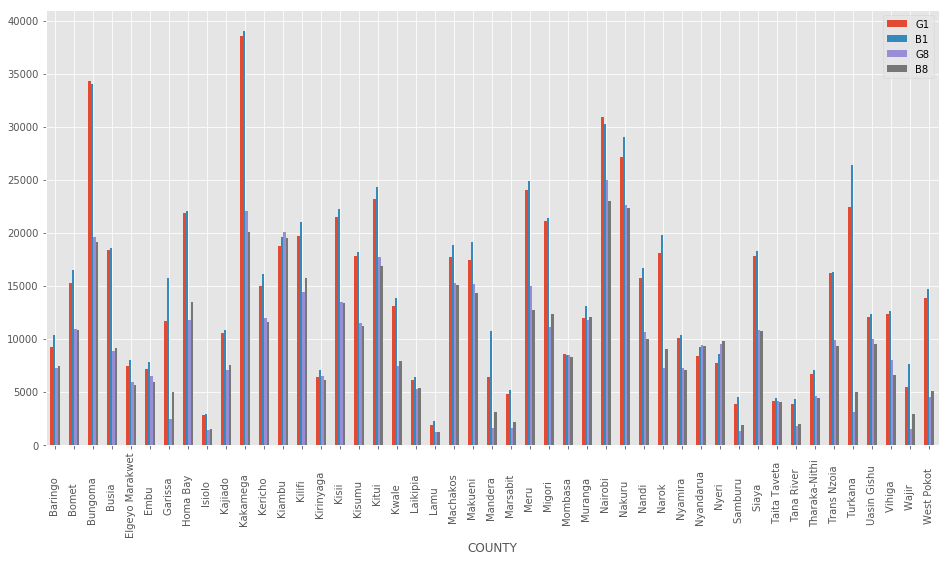

In [9]:
class01_vs_08 = pd.DataFrame(kenya_ed_2014, columns=['G1', 'B1', 'G8', 'B8'])
class01_vs_08.plot.bar(figsize=(16, 8))

In [10]:
girls_all = pd.DataFrame(kenya_ed_2014, columns=['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f400e4832e8>,
      dtype=object)

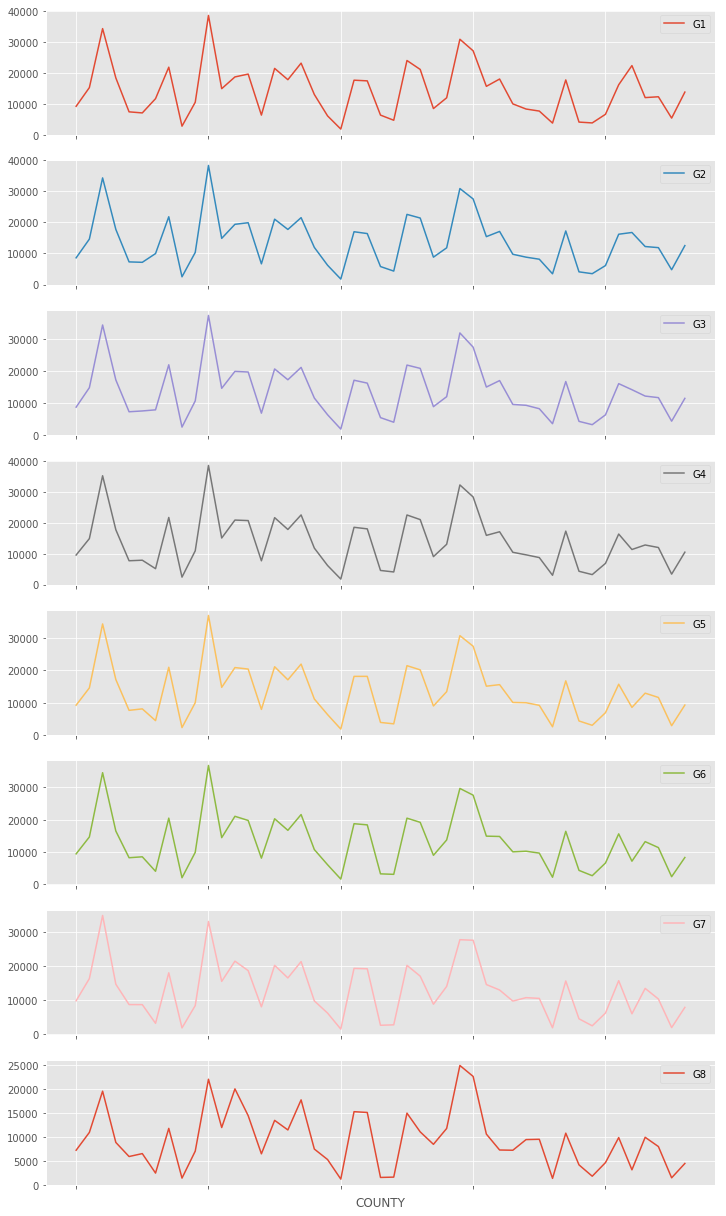

In [11]:
girls_all.plot(subplots=True, figsize=(12, 24))

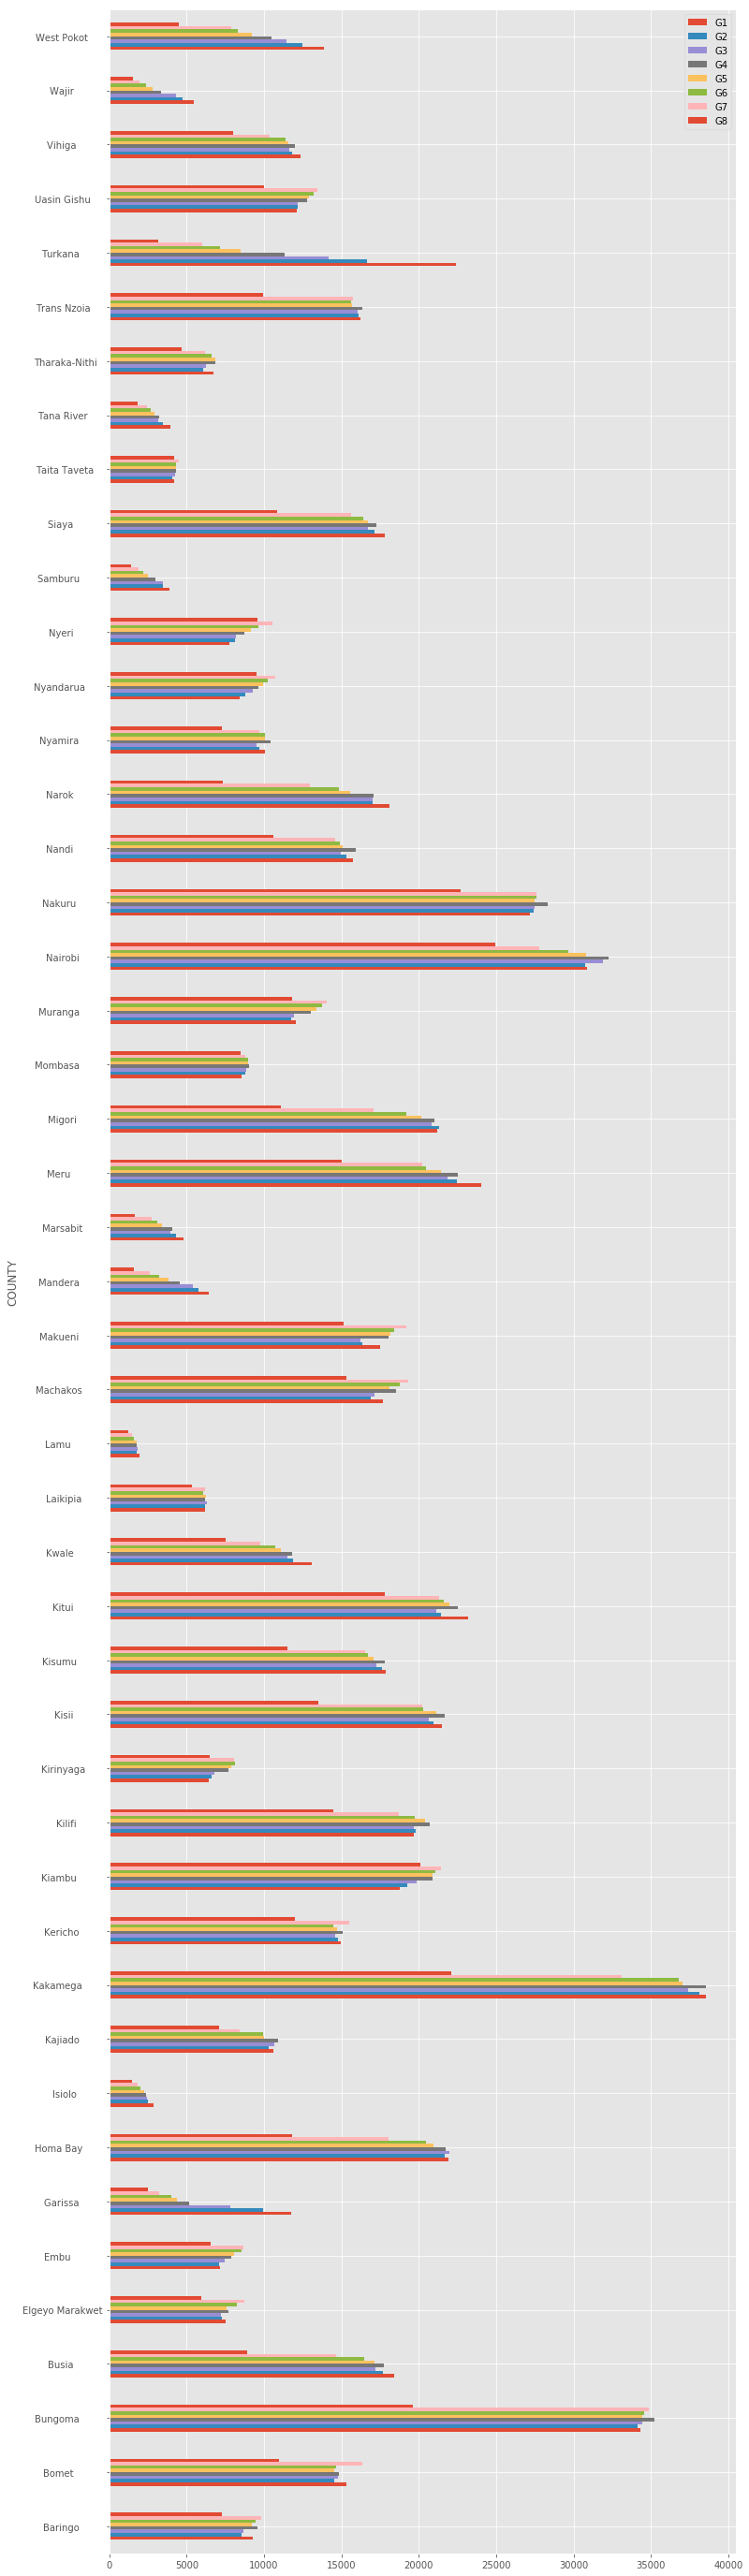

In [12]:
girls_all.plot.barh(figsize=(12, 50))